In [1]:
#Importing Packages
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)

In [2]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

#Plotting a Single Image
image_file = get_pkg_data_filename('oaCapture-20230317-145558.fits')

In [3]:
#Seeing what each data column yields
fits.info(image_file)

Filename: oaCapture-20230317-145558.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (2592, 1944)   uint8   


In [4]:
#Finding the dimensions of each frame
image_data = fits.getdata(image_file, ext=0)
print(image_data.shape)

(1944, 2592)


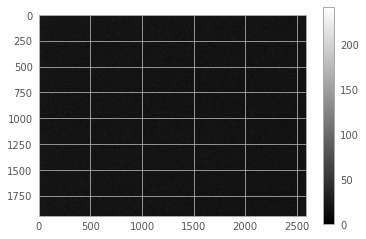

In [5]:
#Plot of a Test Frame
plt.figure()
plt.imshow(image_data, cmap='gray')
plt.colorbar()
plt.show()

In [6]:
image_file2 = get_pkg_data_filename('oaCapture-20230317-145519.fits')
fits.info(image_file2)

Filename: oaCapture-20230317-145519.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (2592, 1944)   uint8   


In [7]:
image_data2 = fits.getdata(image_file2, ext=0)
print(image_data2.shape)

(1944, 2592)


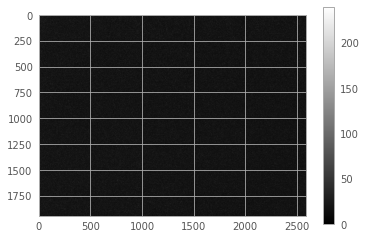

In [8]:
#Second Plot of a Test Frame
plt.figure()
plt.imshow(image_data2, cmap='gray')
plt.colorbar()
plt.show()

### Dark Frames are yielding dark images as expected; need to consolidate them before exporting them though

# Taking the Average of All the Dark Frames and Bias Frames

In [9]:
from os import listdir
import numpy as np

In [10]:
#Averaging the Dark Frames
dark_frames = listdir('Correct Dark Frames')


#Iterating through all of the dark images
data_dark_frames = []

for i in dark_frames:
    #Getting data from each identified frame
    image_data = fits.getdata('Correct Dark Frames/'+ i, ext=0)
    #Compiling them together
    data_dark_frames.append(image_data)


dframes_array = np.array(data_dark_frames)
out_dark = np.zeros((1944, 2592))

#Finding the average fluctuation for each pixel (iterating through all Dark Frames)
for i in range(1944):
    for j in range(2592):
        out_dark[i, j] = np.mean(dframes_array[:, i, j])
        

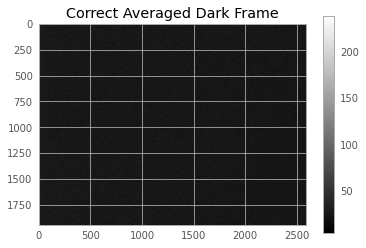

In [12]:
#Averaged Dark Frame Plot
plt.figure()
plt.imshow(out_dark, cmap='gray')
plt.title("Correct Averaged Dark Frame")
plt.colorbar()
plt.show()

In [13]:
#Averaging the Bias Frames
bias_frames = listdir('Correct Bias Frames')


#Iterating through all of the bias images
data_bias_frames = []

for i in bias_frames:
    #Getting data from each identified frame
    image_data = fits.getdata('Correct Bias Frames/'+ i, ext=0)
    #Compiling them together
    data_bias_frames.append(image_data)


bframes_array = np.array(data_bias_frames)
out_bias = np.zeros((1944, 2592))

#Finding the average fluctuation for each pixel (iterating through all Bias Frames)
for i in range(1944):
    for j in range(2592):
        out_bias[i, j] = np.mean(bframes_array[:, i, j])

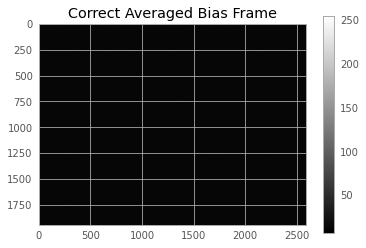

In [14]:
#Averaged Bias Frame Plot
plt.figure()
plt.imshow(out_bias, cmap='gray')
plt.title("Correct Averaged Bias Frame")
plt.colorbar()
plt.show()

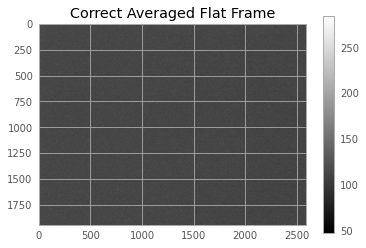

In [15]:
#Finding the averaged flat frame
#+100 is to prevent any negative numbers
flat_frames = (out_dark - out_bias) + 100

plt.figure()
plt.imshow(flat_frames, cmap='gray')
plt.title("Correct Averaged Flat Frame")
plt.colorbar()
plt.show()

In [22]:
print(flat_frames[0])
print(flat_frames[1])

print(np.min(flat_frames[0]))
print(np.min(flat_frames[1]))

[107.52631579 104.21929825 205.81871345 ... 124.52339181 105.21052632
 107.16081871]
[104.31578947 101.60818713 105.63157895 ... 101.34795322 105.89473684
 101.19005848]
101.22514619883042
99.40350877192982


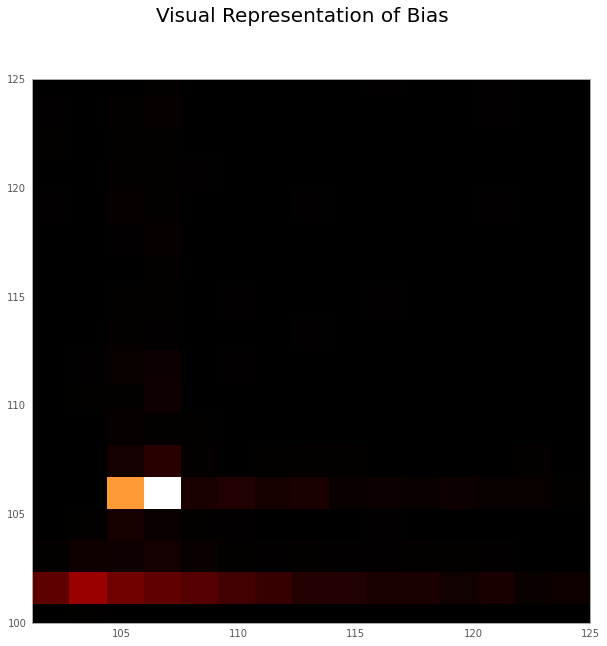

In [27]:
#Visual Representation of the Calibration Bias
plt.figure(figsize = (10,10))
plt.hist2d(flat_frames[0], flat_frames[1], bins = 100)
plt.suptitle("Visual Representation of Bias", size=20)
plt.xlim(101.22514619883042, 125)
plt.ylim(100, 125)
plt.show()